# Capital Asset Pricing Model (Expanded)

The Capital Asset Pricing Model (CAPM) is a cornerstone of modern financial theory, providing a framework for understanding the trade-off between risk and return for individual assets in a diversified portfolio. Developed by William Sharpe in the 1960s, CAPM posits that the expected return of an asset is directly related to its systematic risk, as measured by beta (𝛽). Beta represents the sensitivity of an asset's returns to the returns of the overall market, capturing the asset's exposure to market-wide risk factors.

**Expected Return= R𝑓 + 𝛽 × (Rm− Rf)**

Where:

- R𝑓 is the risk-free rate.
- 𝛽 (beta) is the measure of the asset's volatility relative to the market.
- 𝑅𝑚 is the expected market return.
- (𝑅𝑚 − 𝑅𝑓) is the market risk premium.



Traditional Assets

**Apple Inc. (AAPL)**: Apple is a leading technology company known for its consumer electronics products such as the iPhone, iPad, Mac computers, and services like the App Store and iCloud.

**Microsoft Corporation (MSFT)**: Microsoft is a multinational technology company that develops, manufactures, licenses, supports, and sells software, electronics, personal computers, and related services. Its flagship products include the Windows operating system, Microsoft Office suite, and Azure cloud services.

**Amazon.com, Inc. (AMZN)**: Amazon is a global e-commerce and cloud computing company. It is the largest online retailer in the world and also provides cloud infrastructure services through Amazon Web Services (AWS).

**Alphabet Inc. (GOOGL)**: Alphabet is the parent company of Google and several former Google subsidiaries. Google is the world’s leading search engine and also offers various online advertising services, software, and hardware products.

**Tesla, Inc. (TSLA)**: Tesla is an electric vehicle and clean energy company. It designs and manufactures electric cars, battery energy storage systems, and solar products. Tesla is known for its innovation in the automotive industry.

**SPDR S&P 500 ETF Trust (SPY)**: This ETF seeks to provide investment results that, before expenses, correspond generally to the price and yield performance of the S&P 500 Index, which measures the performance of 500 large-cap U.S. stocks.

**iShares Core U.S. Aggregate Bond ETF (AGG)**: AGG aims to track the investment results of an index composed of the total U.S. investment-grade bond market, including government, corporate, and mortgage-backed securities.

**Invesco Global Listed Private Equity Portfolio (PSP)**: PSP provides exposure to publicly traded private equity companies, offering insight into the performance of private equity investments through publicly listed firms.

**Vanguard Real Estate ETF (VNQ)**: VNQ seeks to track the performance of the MSCI US Investable Market Real Estate 25/50 Index, which measures the performance of real estate investment trusts (REITs) and other real estate-related investments.

**SPDR Gold Shares ETF (GLD)**: GLD seeks to reflect the performance of the price of gold bullion, less the Trust’s expenses. It is often used as a hedge against inflation and currency risk.

**iShares Silver Trust (SLV)**: SLV seeks to reflect the performance of the price of silver, minus expenses. It provides a simple, cost-effective way to gain exposure to the price movement of silver, making it an attractive investment for those looking to diversify their portfolios with commodities.


**United States Oil Fund (USO)**: USO aims to track the daily price movements of West Texas Intermediate (WTI) light, sweet crude oil. It provides exposure to oil prices and is used to gain exposure to the energy market.

**Dow Jones Industrial Average (DJI)**: The DJIA is a stock market index that measures the stock performance of 30 large, publicly-owned companies listed on stock exchanges in the United States. It is one of the oldest and most well-known indices in the world.

Cryptocurrencies

**Bitcoin (BTC-USD)**: Bitcoin is the first and most widely recognized cryptocurrency, often referred to as digital gold. It is a decentralized digital currency without a central bank or single administrator.

**Ethereum (ETH-USD)**: Ethereum is a decentralized platform that enables smart contracts and decentralized applications (DApps) to be built and run without any downtime, fraud, control, or interference from a third party.

**Solana (SOL-USD)**: Solana is a high-performance blockchain supporting builders around the world creating crypto apps that scale today. It is known for its fast transaction speeds and low fees.

**Binance Coin (BNB-USD)**: Binance Coin is the cryptocurrency of the Binance exchange. Initially created as a utility token for discounted trading fees, its use cases have expanded to various applications on Binance's platform and other ecosystems.

**XRP (XRP-USD)**: XRP is a digital payment protocol and cryptocurrency designed for fast and low-cost international money transfers. It is often associated with its parent company, Ripple.

**Toncoin (TON-USD)**: Toncoin is the native cryptocurrency of The Open Network (TON), a blockchain originally developed by Telegram to provide fast, secure, and scalable digital transactions.

**Dogecoin (DOGE-USD)**: Originally created as a joke, Dogecoin has gained popularity as a cryptocurrency due to its active community and use in microtransactions and charitable events.

**Cardano (ADA-USD)**: Cardano is a blockchain platform for smart contracts, aiming to provide more advanced features than any protocol previously developed. It focuses on security, scalability, and sustainability.

**Shiba Inu (SHIB-USD)**: Shiba Inu is a decentralized cryptocurrency created as an experiment in community building and decentralized spontaneous growth, often seen as an alternative to Dogecoin.

**Avalanche (AVAX-USD)**: Avalanche is a platform for launching decentralized applications and enterprise blockchain deployments in one interoperable, scalable ecosystem. It aims to improve blockchain technology’s speed, scalability, and security.

Index

**Bitwise 10 Crypto Index Fund (BITW)**: BITW aims to track the performance of the Bitwise 10 Large Cap Crypto Index, which is designed to provide exposure to the 10 largest cryptocurrencies, weighted by market capitalization.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

# Define the assets
assets = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'AGG', 'PSP', 'VNQ', 'SLV', 'GLD', 'USO', 'DJI']
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']
index = 'BITW'

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download data for all assets and the index
data = yf.download(cryptos + assets + [index], start=start_date, end=end_date)['Adj Close']


# Forward fill missing values
data.ffill(inplace=True)

# Drop any remaining NaN values
data.dropna(inplace=True)

# Calculate daily returns
returns = data.pct_change().dropna()
market_returns = returns[index]

[*********************100%%**********************]  24 of 24 completed


# Beta Calculation

In [51]:
# Initialize dictionaries to store betas, R-squared, and p-values for different asset classes
betas = {
    'Equities': {},
    'Bonds': {},
    'Real Estate': {},
    'Commodities': {},
    'Private Equity': {},
    'Cryptos': {}
}
regression_diagnostics = {
    'Equities': {},
    'Bonds': {},
    'Real Estate': {},
    'Commodities': {},
    'Private Equity': {},
    'Cryptos': {}
}

# Categorize assets into respective classes
asset_classes = {
    'Equities': ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'DJI'],
    'Bonds': ['AGG'],
    'Real Estate': ['VNQ'],
    'Commodities': ['GLD', 'USO', 'SLV'],
    'Private Equity': ['PSP'],
    'Cryptos': cryptos
}

# Calculate beta and perform regression diagnostics for each asset
for category, assets in asset_classes.items():
    for asset in assets:
        # Prepare the data for regression
        X = market_returns
        y = returns[asset]

        # Add constant term for intercept
        X = sm.add_constant(X)
        
        # Perform the regression
        model = sm.OLS(y, X).fit()
        
        # Get the beta (slope of the regression line)
        beta = model.params[1]
        r_squared = model.rsquared
        p_value = model.pvalues[1]
        
        # Store the beta value and regression diagnostics
        betas[category][asset] = beta
        regression_diagnostics[category][asset] = {
            'R-squared': model.rsquared,
            'p-value': model.pvalues.iloc[1]  # Use iloc for positional access
        }


/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_10581/4148683945.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_10581/4148683945.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_10581/4148683945.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

# Average Risk Free Rate Calculation

1. Determine the Risk-Free Rate

The risk-free rate is typically the return on government bonds, such as U.S. Treasury bills. We used the yield on a 10-year U.S. Treasury bond as a proxy for the risk-free rate.

We decied to determine the **average** risk-free rate over your analysis period, you can use historical data for the 10-year Treasury yield or another appropriate risk-free rate proxy. This data can be sourced from financial websites like the U.S. Treasury or financial data providers.



In [52]:
# Calculate the average risk-free rate over the period
treasury_yield = yf.download('^TNX', start=start_date, end=end_date)['Adj Close'] / 100
average_risk_free_rate = treasury_yield.mean()

[*********************100%%**********************]  1 of 1 completed


# Market Returns

2. Calculate the Expected Market Return

The expected market return can be the average return of broad market for each asset.


# Beta Calculation + Market Risk Premium

3. Calculate the Beta

Beta measures the volatility of a cryptocurrency relative to the market. 

To calculate beta:
1. Collect Historical Price Data: Obtain historical daily prices for each cryptocurrency and the chosen market index.
2. Calculate Returns: Compute the daily returns for each cryptocurrency and the market index.
3. Run a Regression Analysis: Perform a linear regression with the cryptocurrency returns as the dependent variable and the market index returns as the independent variable. The slope of the regression line is the beta.

4. Compute the Market Risk Premium (\(R_m - R_f\))

The market risk premium is the difference between the expected market return and the risk-free rate.


In [53]:
# Calculate the CAPM expected returns
capm_returns = {}
for category, beta_dict in betas.items():
    capm_returns[category] = {}
    for asset, beta in beta_dict.items():
        expected_return = average_risk_free_rate + beta * (market_returns.mean() - average_risk_free_rate)
        capm_returns[category][asset] = expected_return

In [54]:
from tabulate import tabulate

# Prepare the data for the table
table_data = []

for category, returns in capm_returns.items():
    for asset, expected_return in returns.items():
        diagnostics = regression_diagnostics[category][asset]
        table_data.append([
            category,
            asset,
            f"{expected_return:.4f}",
            f"{betas[category][asset]:.4f}",
            f"{diagnostics['R-squared']:.4f}",
            f"{diagnostics['p-value']:.4f}"
        ])

# Define the table headers
headers = ["Asset Class", "Asset", "Expected Return (CAPM)", "Beta", "R-squared", "p-value"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="pretty"))


+----------------+----------+------------------------+--------+-----------+---------+
|  Asset Class   |  Asset   | Expected Return (CAPM) |  Beta  | R-squared | p-value |
+----------------+----------+------------------------+--------+-----------+---------+
|    Equities    |   AAPL   |         0.0294         | 0.1489 |  0.1295   | 0.0000  |
|    Equities    |   MSFT   |         0.0295         | 0.1469 |  0.1127   | 0.0000  |
|    Equities    |   AMZN   |         0.0270         | 0.2194 |  0.1310   | 0.0000  |
|    Equities    |  GOOGL   |         0.0289         | 0.1653 |  0.1108   | 0.0000  |
|    Equities    |   TSLA   |         0.0251         | 0.2734 |  0.1018   | 0.0000  |
|    Equities    |   SPY    |         0.0308         | 0.1084 |  0.1519   | 0.0000  |
|    Equities    |   DJI    |         0.0343         | 0.0089 |  0.0176   | 0.0003  |
|     Bonds      |   AGG    |         0.0342         | 0.0115 |  0.0108   | 0.0051  |
|  Real Estate   |   VNQ    |         0.0315         |

In [55]:
# Combine all expected returns into a single DataFrame
rows = []

for category, beta_dict in betas.items():
    for asset, beta in beta_dict.items():
        expected_return = capm_returns[category][asset]
        diagnostics = regression_diagnostics[category][asset]
        rows.append({
            'Asset': asset,
            'Asset Class': category,
            'Beta': beta,
            'Expected Return (CAPM)': expected_return,
            'R-squared': diagnostics['R-squared'],
            'p-value': diagnostics['p-value']
        })

capm_df = pd.DataFrame(rows)

# Display the DataFrame
print(capm_df)


       Asset     Asset Class      Beta  Expected Return (CAPM)  R-squared  \
0       AAPL        Equities  0.148944                0.029443   0.129458   
1       MSFT        Equities  0.146872                0.029515   0.112713   
2       AMZN        Equities  0.219366                0.027006   0.130983   
3      GOOGL        Equities  0.165319                0.028877   0.110827   
4       TSLA        Equities  0.273389                0.025136   0.101843   
5        SPY        Equities  0.108364                0.030848   0.151931   
6        DJI        Equities  0.008925                0.034290   0.017618   
7        AGG           Bonds  0.011475                0.034202   0.010777   
8        VNQ     Real Estate  0.088390                0.031540   0.075417   
9        GLD     Commodities  0.019459                0.033926   0.009092   
10       USO     Commodities  0.040779                0.033188   0.005883   
11       SLV     Commodities  0.067098                0.032277   0.029105   

In [56]:
from tabulate import tabulate

# Prepare the data for the table
table_data = []

for category, returns in capm_returns.items():
    for asset, expected_return in returns.items():
        beta = betas[category][asset]
        market_risk_premium = market_returns.mean() - average_risk_free_rate
        capm_return = average_risk_free_rate + beta * market_risk_premium
        table_data.append([
            asset,
            f"{beta:.4f}",
            f"{market_risk_premium:.4f}",
            f"{capm_return:.4f}"
        ])

# Define the table headers
headers = ["Asset", "Beta", "Market Risk Premium", "Expected Return (CAPM)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="pretty"))


+----------+--------+---------------------+------------------------+
|  Asset   |  Beta  | Market Risk Premium | Expected Return (CAPM) |
+----------+--------+---------------------+------------------------+
|   AAPL   | 0.1489 |       -0.0346       |         0.0294         |
|   MSFT   | 0.1469 |       -0.0346       |         0.0295         |
|   AMZN   | 0.2194 |       -0.0346       |         0.0270         |
|  GOOGL   | 0.1653 |       -0.0346       |         0.0289         |
|   TSLA   | 0.2734 |       -0.0346       |         0.0251         |
|   SPY    | 0.1084 |       -0.0346       |         0.0308         |
|   DJI    | 0.0089 |       -0.0346       |         0.0343         |
|   AGG    | 0.0115 |       -0.0346       |         0.0342         |
|   VNQ    | 0.0884 |       -0.0346       |         0.0315         |
|   GLD    | 0.0195 |       -0.0346       |         0.0339         |
|   USO    | 0.0408 |       -0.0346       |         0.0332         |
|   SLV    | 0.0671 |       -0.034

# Visualization

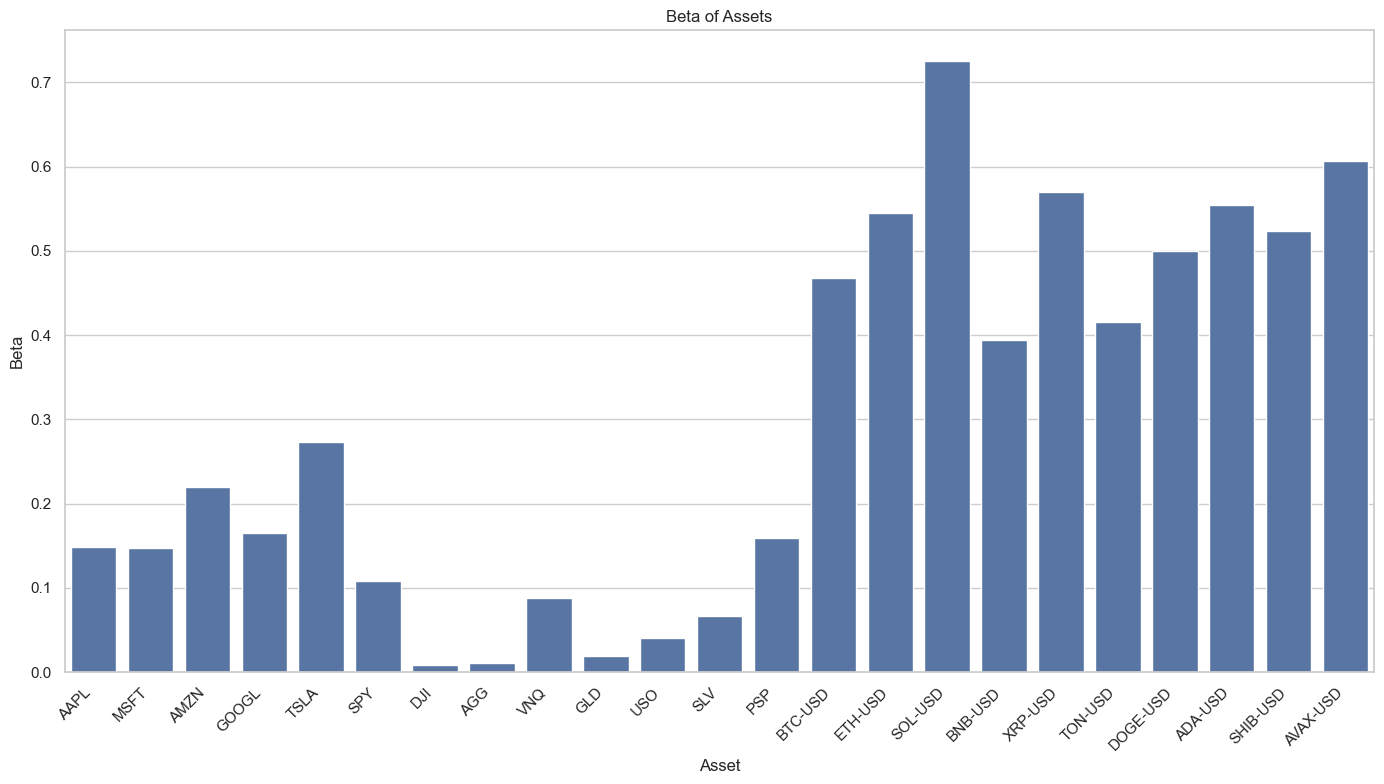

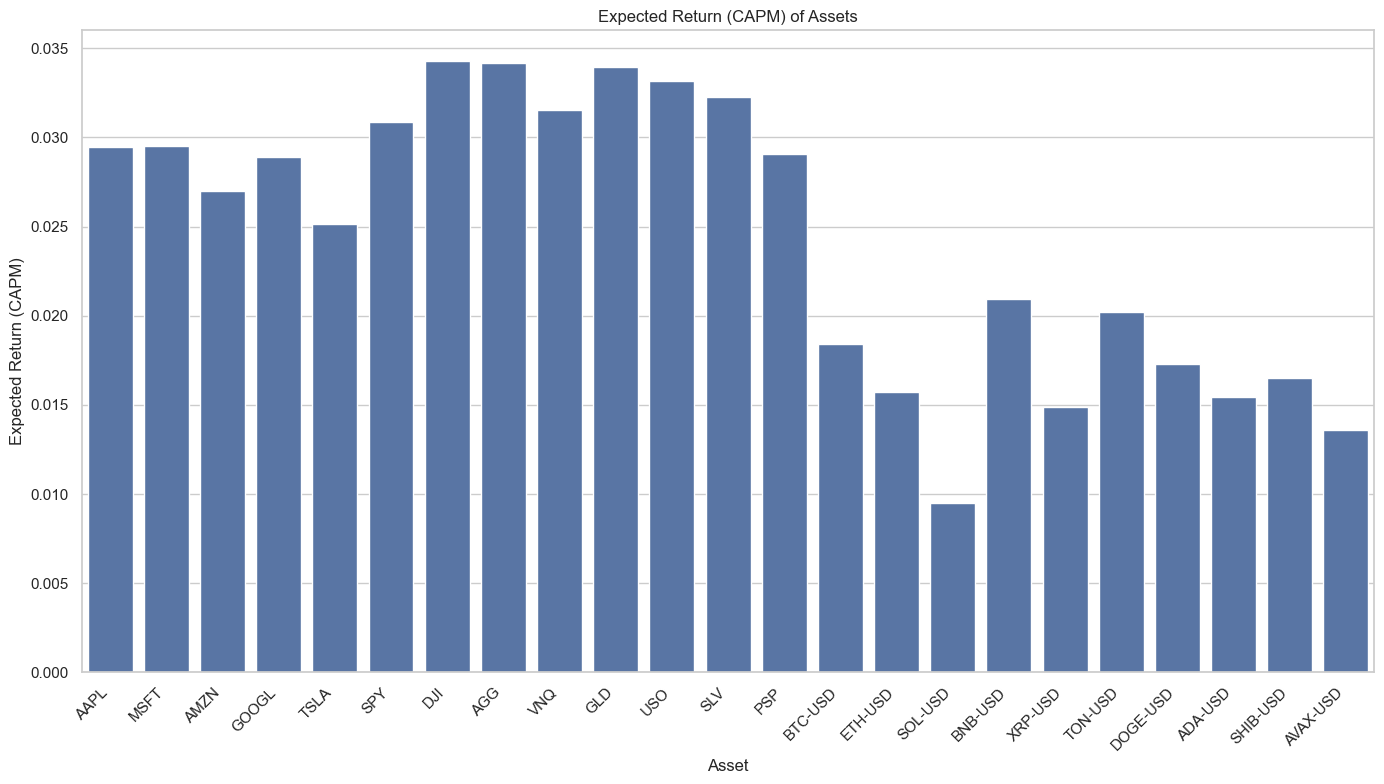

In [57]:
# Setting the style
sns.set(style="whitegrid")

# Plot Beta
plt.figure(figsize=(14, 8))
sns.barplot(x='Asset', y='Beta', data=capm_df)
plt.title('Beta of Assets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Asset')  # Set x-axis label
plt.ylabel('Beta')
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

# Plot Expected Return (CAPM)
plt.figure(figsize=(14, 8))
sns.barplot(x='Asset', y='Expected Return (CAPM)', data=capm_df)
plt.title('Expected Return (CAPM) of Assets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Asset')  # Set x-axis label
plt.ylabel('Expected Return (CAPM)')
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()
